In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import os
plt.style.use('ggplot')

path_root = os.environ.get('DECIDENET_PATH')
path_code = os.path.join(path_root, 'code')
if path_code not in sys.path:
    sys.path.append(path_code)

from dn_utils.plotting import plot_z_convergence
from dn_utils.jags import report_convergence

In [2]:
path_jags_output = os.path.join(path_root, 'data/main_fmri_study/derivatives/jags/jags_output/')

path_full = os.path.join(path_jags_output, 'HLM_sequential_split.mat')
path_pdci = os.path.join(path_jags_output, 'H_pdci.mat')

n_subjects = 32

=== HLM Sequential ===


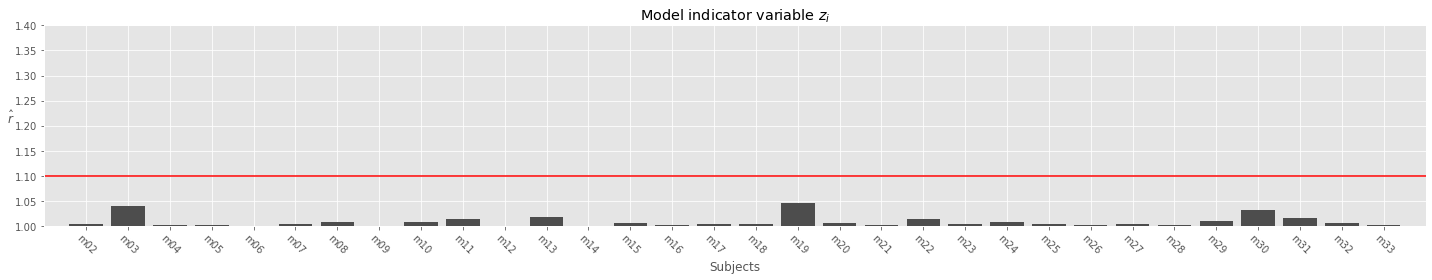

In [3]:
print('=== HLM Sequential ===')
mat = scipy.io.loadmat(path_full, variable_names=['stats'], squeeze_me=True)
plot_z_convergence(mat['stats']['Rhat'].item()['z'].item())

In [4]:
print('=== H PDCI ===')
mat = scipy.io.loadmat(path_pdci, variable_names=['stats'], squeeze_me=True)
report_convergence(mat)

=== H PDCI ===
Looking for failed convergence...
[OK] node(s) theta converged
[OK] node(s) alpha_pdci converged
[OK] node(s) beta_pdci converged
[OK] node(s) a_alpha_pdci converged
[OK] node(s) b_alpha_pdci converged
[OK] node(s) mu_beta_pdci converged
[OK] node(s) sigma_beta_pdci converged
[OK] node(s) deviance converged

Summary:
100.00% nodes converged


